In [1]:
!pip install lyricsgenius

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 2.3 MB/s eta 0:00:00


In [2]:
# Client ID
#client_id = "Fz6yn9NdgHxpfaPcHNb01ueqOqzoqYxzRBaA52foqHaUjVoYVHO_LCX-eoOuVon2"
#client_secret = "luwZo-93PnmLhVjDMvcdLeD_8GI9gyw5K6tqLwIK0FmabBGISrECqFbP8g3g3bx8NTcjsO0WaauVv8mzh2apKA"
TOKEN = "CXZw1cMn9OHw9FLCWTgv-xusMhQH6xjYGfcWqdYbLC7aE07J5r7iX02OIJHVOjj5"

In [3]:
# Initialize Genius API with your token
genius = lyricsgenius.Genius(TOKEN, timeout=15)

# Fetch Lyrics
def fetch_lyrics(artist_name, song_title):
    from bs4 import BeautifulSoup
    import requests
    headers = {"Authorization": f"Bearer {TOKEN}"}
    query = f"{song_title} {artist_name}"
    url = f"https://genius.com/api/search/multi?q={requests.utils.quote(query)}"
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
    except requests.exceptions.HTTPError as e:
        print(f"Error fetching lyrics: {e}")
        if response.status_code == 403:
            print("Check your API token or permissions.")
        elif response.status_code == 429:
            print("Rate limit exceeded. Try again later.")
        return None

# Sentiment Analysis
def analyze_sentiment(lyrics):
    # Use TextBlob for sentiment analysis
    analysis = TextBlob(lyrics)
    return {
        "polarity": analysis.sentiment.polarity,
        "subjectivity": analysis.sentiment.subjectivity
    }

# Analyze Lyrics of a Song
def analyze_song_sentiment(artist, title):
    lyrics = fetch_lyrics(artist, title)
    if lyrics:
        sentiment = analyze_sentiment(lyrics)
        print(f"Song: {title} by {artist}")
        print(f"Polarity: {sentiment['polarity']}, Subjectivity: {sentiment['subjectivity']}")
        return sentiment
    else:
        print("Lyrics not found.")
        return None

# Example usage
artist_name = "Taylor Swift"
song_title = "Anti-Hero"

analyze_song_sentiment(artist_name, song_title)


NameError: name 'lyricsgenius' is not defined

In [ ]:
  # genius = lyricsgenius.Genius(TOKEN, timeout=15)

  # artist = "Taylor Swift"
  # title = "Anti-Hero"
  # song = genius.search_song(title, artist)
  # time.sleep(2)
  # if song is not None:
  #   lyrics = song.lyrics # add lyrics


  # song

In [14]:
#import lyricsgenius
from textblob import TextBlob
import time
from google.colab import files


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk


from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint


In [3]:
!pip install gensim

In [4]:
! conda list| grep gensim

/bin/bash: line 1: conda: command not found


In [5]:
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models, similarities

In [6]:
!pip install wordcloud

In [7]:
!pip install pillow==9.5.0

In [8]:
!pip freeze
!python -V

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.11.2
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.6
astropy-iers-data==0.2024.11.18.0.35.2
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.

In [15]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize
import gensim
#import gensim.summarization
import requests
from bs4 import BeautifulSoup
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
from operator import itemgetter


In [16]:
# Sentiment Analysis functions

uploaded = files.upload()  # Upload the NRC lexicon file


Saving NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt to NRC-emotion-lexicon-wordlevel-alphabetized-v0.92 (1).txt


In [17]:
# Fetch Lyrics
def fetch_lyrics(artist, title):
    url = f"https://api.lyrics.ovh/v1/{artist}/{title}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json().get("lyrics", "Lyrics not found")
    return "Error fetching lyrics"



In [32]:
artist_name = "Chappell Roan"
song_title = "Good Luck Babe!"
lyrics = fetch_lyrics(artist_name, song_title)
lyrics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'It\'s fine, it\'s cool\r\nYou can say that we are nothing but you know the truth\r\nAnd guess I\'m the fool\r\nWith her arms out like an angel through the car sunroof\r\nI don\'t wanna call it off\n\nBut you don\'t wanna call it love\n\nYou only wanna be the one that I call baby\n\n\n\nYou can kiss a hundred boys in bars\n\nShoot another shot, try to stop the feeling\n\nYou can say it\'s just the way you are\n\nMake a new excuse, another stupid reason\n\nGood luck babe (Well, good luck)\n\nWell, good luck babe (Well, good luck)\n\nYou\'d have to stop the world just to stop the feeling\n\nGood luck babe (Well, good luck)\n\nWell, good luck babe (Well, good luck)\n\nYou\'d have to stop the world just to stop the feeling\n\n\n\nYou can say, "Who cares?"\n\nIt\'s a sexually explicit kind of love affair\n\nAnd I cried, it\'s not fair\n\nI just need a little lovin\', I just need a little head\n\n\n\nThink I\'m gonna call it off\n\nEven if you call it love\n\nI just wanna love someone who ca

In [18]:
# Sentiment Analysis 1
def analyze_sentiment(lyrics):
    # Use TextBlob for sentiment analysis
    analysis = TextBlob(lyrics)
    return {
        "polarity": analysis.sentiment.polarity,
        "subjectivity": analysis.sentiment.subjectivity
    }

# Analyze Lyrics of a Song
def analyze_song_sentiment(artist, title):
    lyrics = fetch_lyrics(artist, title)
    if lyrics:
        sentiment = analyze_sentiment(lyrics)
        print(f"Song: {title} by {artist}")
        print(f"Polarity: {sentiment['polarity']}, Subjectivity: {sentiment['subjectivity']}")
        return sentiment
    else:
        print("Lyrics not found.")
        return None

# Example
artist_name = "Chappell Roan"
song_title = "Good Luck Babe!"

analyze_song_sentiment(artist_name, song_title)

Song: Good Luck Babe! by Chappell Roan
Polarity: 0.33401515151515127, Subjectivity: 0.5879393939393942


{'polarity': 0.33401515151515127, 'subjectivity': 0.5879393939393942}

In [19]:
# Sentiment Analysis using NRC

def get_nrc_data(file_path="NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"):
    count = 0
    emotion_dict = dict()
    with open(file_path, 'r') as f:
        for line in f:
            if count < 46:  # Skip the header
                count += 1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:  # Process words associated with emotions
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

emotion_data = get_nrc_data()
#print(dict(list(emotion_data.items())[:10]))


def emotion_analyzer(text,emotion_dict=get_nrc_data()):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

def comparative_emotion_analyzer(text_tuples,object_name="Restaurant",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)

    output = df
    for text_tuple in text_tuples:
        text = text_tuple[1]
        result = emotion_analyzer(text)
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[1][0:20],result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output
#And test it

In [20]:
artist_name = "Chappell Roan"
song_title = "Good Luck Babe!"
artist_name2 = "Sabrina Carpenter"
song_title2 = "Taste"
lyrics = fetch_lyrics(artist_name, song_title)
lyrics2 = fetch_lyrics(artist_name2,song_title2)

# Check if lyrics were fetched successfully
if lyrics:
    print(f"Lyrics for '{song_title}' by {artist_name}:")
    #print(lyrics)


    # Perform emotion analysis
    emotion_results = emotion_analyzer(lyrics)
    print("\nEmotion Analysis Results:")
    for emotion, score in emotion_results.items():
        print(f"{emotion.capitalize()}: {score:.4f}")

    # Comparative emotion analysis (for multiple songs, if needed)
    # Example usage
    song_data = [(f"{artist_name} - {song_title}", lyrics), (f"{artist_name2} - {song_title2}", lyrics2)]
    comparative_results = comparative_emotion_analyzer(song_data, object_name="Song")
    print("\nComparative Emotion Analysis:")
    print(comparative_results)

else:
    print(f"Lyrics not found for '{song_title}' by {artist_name}.")


Lyrics for 'Good Luck Babe!' by Chappell Roan:

Emotion Analysis Results:
Joy: 0.1170
Anticipation: 0.1038
Trust: 0.0751
Fear: 0.0309
Negative: 0.0419
Disgust: 0.0331
Positive: 0.1325
Sadness: 0.0309
Anger: 0.0309
Surprise: 0.1038

Comparative Emotion Analysis:
                                     Fear     Trust  Negative  Positive  \
Song                                                                      
Chappell Roan - Good Luck Babe!  0.030905  0.075055  0.041943  0.132450   
Sabrina Carpenter - Taste        0.000000  0.014493  0.007246  0.025362   

                                      Joy   Disgust  Anticipation   Sadness  \
Song                                                                          
Chappell Roan - Good Luck Babe!  0.116998  0.033113      0.103753  0.030905   
Sabrina Carpenter - Taste        0.014493  0.000000      0.010870  0.003623   

                                 Surprise  
Song                                       
Chappell Roan - Good Luck Babe! 

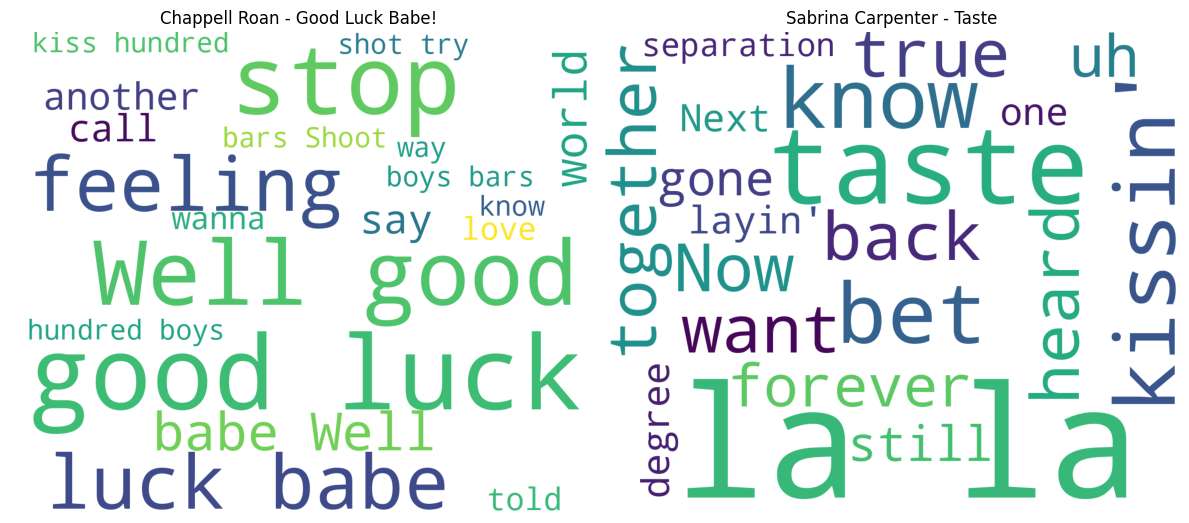

In [21]:
import matplotlib.pyplot as plt

# Remove unwanted words
DELETE_WORDS = []

def remove_words(text_string, DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word, ' ')
    return text_string

MIN_LENGTH = 3

def remove_short_words(text_string, min_length=MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' ' + word + ' ', ' ', 1)
    return text_string

# Set up word cloud generation for lyrics
def generate_wordclouds(lyrics_data):
    COL_NUM = 2
    ROW_NUM = (len(lyrics_data) + 1) // 2  # Determine rows based on number of songs
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12, ROW_NUM * 6))

    for i, (song_title, lyrics) in enumerate(lyrics_data):
        text_string = remove_words(lyrics)
        text_string = remove_short_words(text_string)
        ax = axes[i // 2, i % 2] if ROW_NUM > 1 else axes[i]  # Adjust for single row
        ax.set_title(song_title)
        wordcloud = WordCloud(
            stopwords=STOPWORDS,
            background_color='white',
            width=1200,
            height=1000,
            max_words=20
        ).generate(text_string)
        ax.imshow(wordcloud)
        ax.axis('off')

    # Remove empty axes if any
    for j in range(i + 1, ROW_NUM * COL_NUM):
        fig.delaxes(axes[j // 2, j % 2] if ROW_NUM > 1 else axes[j])

    plt.tight_layout()
    plt.show()

# Example lyrics data
lyrics_data = [
    (f"{artist_name} - {song_title}", lyrics),
    (f"{artist_name2} - {song_title2}", lyrics2)
]

# Generate word clouds for the given lyrics
generate_wordclouds(lyrics_data)


In [22]:

import pprint

# Ensure necessary resources are available
#nltk.download("punkt")
#nltk.download("stopwords")

In [ ]:
import nltk
nltk.download('punkt', force=True)  # Force re-download of punkt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import STOPWORDS

def process_and_train_lda(raw_lyrics, stopwords=STOPWORDS, num_topics=2, passes=10, custom_exclude_words=None):
    """
    Process raw song lyrics and train an LDA model.

    Parameters:
    - raw_lyrics (str or list of str): Lyrics of one or multiple songs. Can be a single string or list of strings.
    - stopwords (set): Set of words to exclude from analysis.
    - num_topics (int): Number of topics for LDA model.
    - passes (int): Number of passes for LDA model training.
    - custom_exclude_words (list of str): Additional words to exclude.

    Returns:
    - lda (LdaModel): Trained LDA model.
    - dictionary (Dictionary): Gensim dictionary of processed text.
    - corpus (list): Bag-of-words representation of the text.
    """
    # Update stopwords if custom words provided
    if custom_exclude_words:
        stopwords = stopwords.union(set(custom_exclude_words))

    # Ensure raw_lyrics is a list of strings
    if isinstance(raw_lyrics, str):
        raw_lyrics = [raw_lyrics]

    # Clean and tokenize stories
    for i in range(len(raw_lyrics)):
        story = raw_lyrics[i]
        sents = sent_tokenize(story)
        for j in range(len(sents)):
            sent = sents[j].strip().replace('\n', '')
            sents[j] = sent
        raw_lyrics[i] = '. '.join(sents)

    # Preprocess text: Tokenization and removal of stopwords
    texts = [
        [word for word in lyric.lower().split() if word not in stopwords and word.isalnum()]
        for lyric in raw_lyrics
    ]

    # Create dictionary and corpus
    dictionary = corpora.Dictionary(texts)  # (word_id, word) pairs
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Train LDA model
    lda = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

    return lda, dictionary, corpus


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
import nltk
nltk.download('punkt_tab')

lda, dictionary, corpus = process_and_train_lda(lyrics)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

[   (   0,
        '0.099*"stop" + 0.085*"good" + 0.058*"babe" + 0.058*"luck" + '
        '0.044*"world" + 0.030*"another" + 0.025*"call" + 0.025*"say"'),
    (   1,
        '0.018*"stop" + 0.017*"good" + 0.017*"luck" + 0.017*"babe" + '
        '0.016*"world" + 0.016*"say" + 0.016*"another" + 0.016*"call"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [43]:
#!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
#!conda list | grep pyldavis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
#import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
